# Build GHZ State

Takes an input state $|x\rangle = |000\dots0\rangle$ and takes it to the GHZ state $\frac{1}{\sqrt{2}}(|0\dots0\rangle+|1\dots1\rangle)$, which can be done by applying the following circuit $U$.

Let $|x\rangle$ be a all zeros state on $n$ qubits,

$$
    \begin{align*}
        U|x\rangle = \frac{1}{\sqrt{2}}(|000\dots0\rangle+|111\dots1\rangle)
    \end{align*}
$$

Where $U$ defines an opperation that applies a Hadamard gate $H$ on the first qubit and Controlled $X$ gates, $CNOT$, on the remaining ones, taking the control qubit as the first one and the targets from the second to the $n$-th qubit.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

In [2]:
def BuildGHZ(n):
    U = QuantumCircuit(n)
    U.h(0)
    for i in range(1, n):
        U.cx(0, i)
    
    U = U.to_gate()
    U.name = 'Build GHZ'
    #ctl_U = U.control() make it a controlled gate
    
    return U

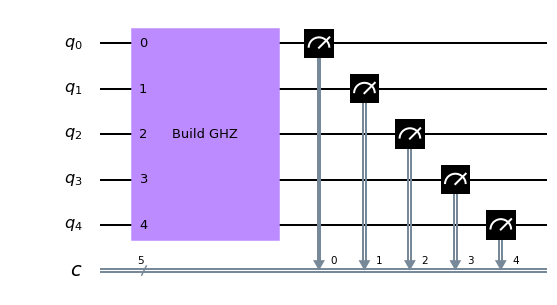

In [3]:
n = 5
mc = QuantumCircuit(n, n)
U = BuildGHZ(n)
mc.append(U, range(n))

mc.measure(range(n), range(n))

backend = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(mc, backend=backend, shots=atp).result()
ans = res.get_counts()

mc.draw('mpl')

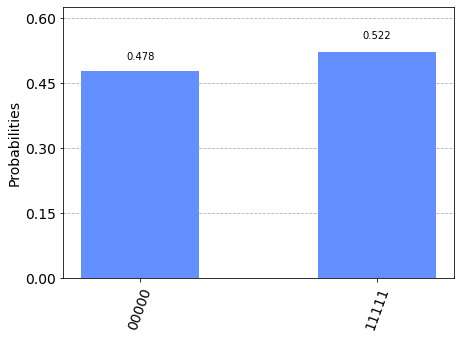

In [4]:
plot_histogram(ans)